In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download shubhamgoel27/dermnet

100% 1.72G/1.72G [00:11<00:00, 185MB/s]
100% 1.72G/1.72G [00:11<00:00, 162MB/s]


In [ ]:
! unzip dermnet.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-8.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthom

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 300
train_path = "/content/train"
test_path = "/content/test"

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR,IMAGE_SIZE,BATCH_SIZE):
  train_datagen = ImageDataGenerator(rescale=(1./255),
                                     shear_range=0.2,
                                     zoom_range=0.3,
                                     width_shift_range=0.2,
                                      height_shift_range=0.2,
                                     horizontal_flip=True)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=BATCH_SIZE,
                                                      class_mode='categorical',
                                                      target_size=(IMAGE_SIZE, IMAGE_SIZE))

  test_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  test_generator = test_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=BATCH_SIZE,
                                                                class_mode='categorical',
                                                                target_size=(IMAGE_SIZE, IMAGE_SIZE))
  ### END CODE HERE
  return train_generator, test_generator

In [ ]:
train_generator,test_generator=train_val_generators(train_path, test_path,IMAGE_SIZE,BATCH_SIZE)

Found 15557 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


(64, 300, 300, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


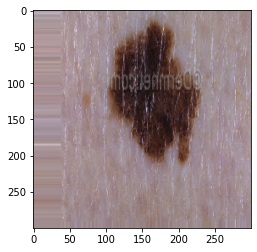

(64, 300, 300, 3)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


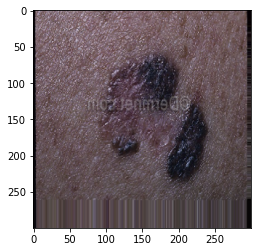

(64, 300, 300, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


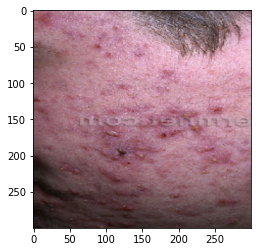

(64, 300, 300, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


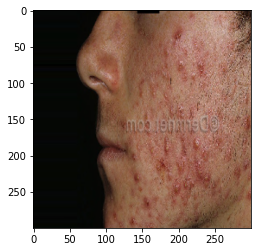

(64, 300, 300, 3)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


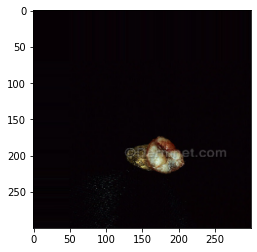

In [ ]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    print(label[0])
    plt.imshow(img[0])
    plt.show()

In [ ]:
class_names = train_generator.class_indices
class_names

{'Acne and Rosacea Photos': 0,
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1,
 'Atopic Dermatitis Photos': 2,
 'Bullous Disease Photos': 3,
 'Cellulitis Impetigo and other Bacterial Infections': 4,
 'Eczema Photos': 5,
 'Exanthems and Drug Eruptions': 6,
 'Hair Loss Photos Alopecia and other Hair Diseases': 7,
 'Herpes HPV and other STDs Photos': 8,
 'Light Diseases and Disorders of Pigmentation': 9,
 'Lupus and other Connective Tissue diseases': 10,
 'Melanoma Skin Cancer Nevi and Moles': 11,
 'Nail Fungus and other Nail Disease': 12,
 'Poison Ivy Photos and other Contact Dermatitis': 13,
 'Psoriasis pictures Lichen Planus and related diseases': 14,
 'Scabies Lyme Disease and other Infestations and Bites': 15,
 'Seborrheic Keratoses and other Benign Tumors': 16,
 'Systemic Disease': 17,
 'Tinea Ringworm Candidiasis and other Fungal Infections': 18,
 'Urticaria Hives': 19,
 'Vascular Tumors': 20,
 'Vasculitis Photos': 21,
 'Warts Molluscum and other Viral Inf

In [ ]:
NUMBER_OF_CLASSES = len(class_names)
print(f'number of classes : {NUMBER_OF_CLASSES}')

number of classes : 23


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), include_top = False, weights = 'imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
for layer in base_model.layers:
    if layer.name == 'mixed3':
      break
    layer.trainable = False
    

In [ ]:
def get_trainability(model): # Takes Keras model and returns dictionary with layer names of Model as key, and its trainability as value/item
    for layer in model.layers:
        print(f'{layer.name} : {layer.trainable}')

In [ ]:
trainability = get_trainability(base_model)
trainability

input_1 : False
conv2d : False
batch_normalization : False
activation : False
conv2d_1 : False
batch_normalization_1 : False
activation_1 : False
conv2d_2 : False
batch_normalization_2 : False
activation_2 : False
max_pooling2d : False
conv2d_3 : False
batch_normalization_3 : False
activation_3 : False
conv2d_4 : False
batch_normalization_4 : False
activation_4 : False
max_pooling2d_1 : False
conv2d_8 : False
batch_normalization_8 : False
activation_8 : False
conv2d_6 : False
conv2d_9 : False
batch_normalization_6 : False
batch_normalization_9 : False
activation_6 : False
activation_9 : False
average_pooling2d : False
conv2d_5 : False
conv2d_7 : False
conv2d_10 : False
conv2d_11 : False
batch_normalization_5 : False
batch_normalization_7 : False
batch_normalization_10 : False
batch_normalization_11 : False
activation_5 : False
activation_7 : False
activation_10 : False
activation_11 : False
mixed0 : False
conv2d_15 : False
batch_normalization_15 : False
activation_15 : False
conv2d_13 

In [ ]:
def output_of_last_layer(pre_trained_model, limit_layer):
  last_desired_layer = pre_trained_model.get_layer(limit_layer)
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(base_model,'mixed5')

last layer output shape:  (None, 17, 17, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 17, 17, 768), dtype=tf.float32, name=None), name='mixed5/concat:0', description="created by layer 'mixed5'")


In [ ]:
from tensorflow.keras.optimizers import Adam

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(NUMBER_OF_CLASSES, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    min_delta=0.001, 
    mode='min'
)

In [ ]:
history = model.fit(train_generator, validation_data = test_generator, epochs = 60)

Epoch 1/60
244/244 [==============================] - 413s 2s/step - loss: 2.8437 - accuracy: 0.2457 - val_loss: 3.5221 - val_accuracy: 0.2009
Epoch 2/60
244/244 [==============================] - 397s 2s/step - loss: 2.3056 - accuracy: 0.3424 - val_loss: 4.3809 - val_accuracy: 0.2879
Epoch 3/60
244/244 [==============================] - 394s 2s/step - loss: 2.1664 - accuracy: 0.3677 - val_loss: 5.1775 - val_accuracy: 0.2696
Epoch 4/60
244/244 [==============================] - 394s 2s/step - loss: 2.0043 - accuracy: 0.4130 - val_loss: 2.7413 - val_accuracy: 0.2709
Epoch 5/60
244/244 [==============================] - 393s 2s/step - loss: 1.8935 - accuracy: 0.4401 - val_loss: 2.6196 - val_accuracy: 0.3468
Epoch 6/60
244/244 [==============================] - 397s 2s/step - loss: 1.8003 - accuracy: 0.4668 - val_loss: 2.3569 - val_accuracy: 0.3483
Epoch 7/60
244/244 [==============================] - 400s 2s/step - loss: 1.6923 - accuracy: 0.4957 - val_loss: 2.7292 - val_accuracy: 0.3341

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure(figsize=(6,6))


plt.show()

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')